In [1]:
import os
os.environ['THEANO_FLAGS']='device=cpu'
import time

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

#my functions
from utils import load_data,my_xgb_cv_predict

#go to working directory
work_dir='/data/data1/ribli/mhc/'
os.chdir(work_dir)

Using Theano backend.


In [2]:
x,y=load_data(hla_representation='one-hot',seq_representation='one-hot')

Reading from file...
Creating representation...
Using  83751 data points
Done, It took: 1.94233202934 s


In [ ]:
#model params
params = {'max_depth':20,
         'eta':0.05,
         'min_child_weight':5,
         'colsample_bytree':1,
         'subsample':1,
         'silent':1,
         'objective': "reg:linear",
         'eval_metric': 'rmse',
         'nthread':8}

y_pred=my_xgb_cv_predict(params,x,y,n_folds=5)

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-rmse:2.540343	eval-rmse:2.537661
[500]	train-rmse:0.483967	eval-rmse:0.871071
[1000]	train-rmse:0.344135	eval-rmse:0.852576
[1500]	train-rmse:0.273328	eval-rmse:0.849201
Stopping. Best iteration:
[1403]	train-rmse:0.284665	eval-rmse:0.849129

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-rmse:2.547523	eval-rmse:2.549472
[500]	train-rmse:0.480919	eval-rmse:0.861777
[1000]	train-rmse:0.338396	eval-rmse:0.848323
Stopping. Best iteration:
[1299]	train-rmse:0.291956	eval-rmse:0.846818

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-rmse:2.544179	eval-rmse:2.539879
[500]	train-rmse:0.480734	eval-rmse:0.879786
[1000]	train-rmse:0.340479	eval-rmse:0.863959
[1500]	train-rmse:0.275894	eval-rmse:0.862334
Stopping. Best iteration:
[1519]	train-rmse:0.273842	eval-rmse:0.862213

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-rmse:2.544335	eval-rmse:2.539241


### Correlation plot

Correlation: 0.766190219936


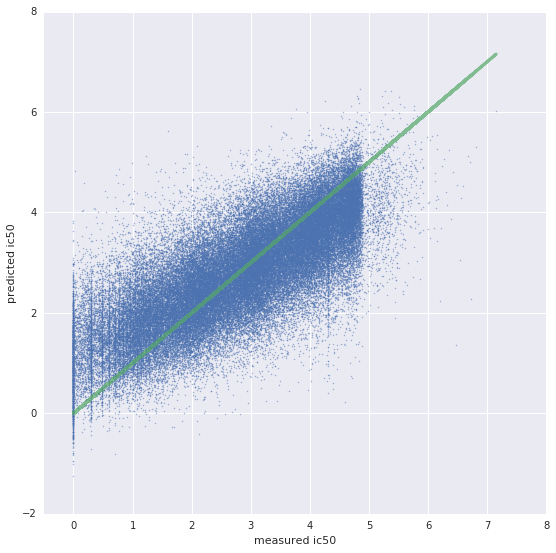

In [6]:
plt.figure(figsize=(9,9))
plt.plot(y,y_pred,'.',ms=3,alpha=0.5)
plt.plot(y,y,lw=3,alpha=0.7)
plt.xlim(xmin=-0.5)
plt.xlabel('measured ic50')
plt.ylabel('predicted ic50')

from scipy.stats import pearsonr
print 'Correlation:',pearsonr(y,y_pred)[0]

### Error depending on the length of peptid

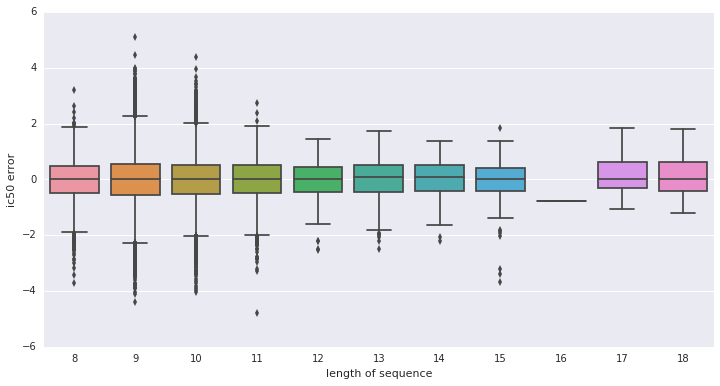

In [7]:
leng=x[:,-1]
plt.figure(figsize=(12,6))
sns.boxplot(leng,y-y_pred)
plt.xlabel('length of sequence')
dump=plt.ylabel('ic50 error')